In [1]:
import pandas as pd 
from sqlite3 import connect
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import simplefilter
from scipy.signal import detrend
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
sns.set()
import pandasql as psql
#machine learning and statistical methods
import statsmodels.api as sm
import math
#dataframe index manipulations
import datetime
from datetime import datetime
#selected preprocessing and evaluation methods
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import DecomposeResult
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error
from prophet import Prophet
from neuralprophet import NeuralProphet
import tensorflow as tf
import torch 
import pickle
from sklearn.model_selection import TimeSeriesSplit
from  neuralprophet import set_random_seed
from pytorch_lightning.callbacks import EarlyStopping

2023-08-23 14:16:16.612693: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import torch

In [2]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)
use_cuda

__CUDNN VERSION: 8700
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce RTX 3050 Laptop GPU
__CUDA Device Total Memory [GB]: 4.094164992


True

In [4]:
tf.config.list_physical_devices('GPU')


2023-08-21 18:37:11.426219: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-21 18:37:11.426371: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-21 18:37:11.426507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-21 18:37:11.426633: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.035GHz coreCount: 16 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 163.94GiB/s
2023-08-21 18:37:11.426672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-08-21 18:37:11.427954: I tensorflow/stream_executor/

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
formtemplatesclones=pd.read_csv("/home/batuhan-saylam/Desktop/JotformProject/formTemplatesClones.csv",parse_dates=["date"])
formtemplatescategories=pd.read_csv("/home/batuhan-saylam/Desktop/JotformProject/formTemplatesCategories.csv")
formtemplates=pd.read_excel("/home/batuhan-saylam/Desktop/JotformProject/formTemplates_1_.xlsx")

In [3]:




formtemplatescategoriesPharmacy=formtemplatescategories[formtemplatescategories["metaKeywords"]=='Tax Forms']

formtemplatesclones=formtemplatesclones.rename({"templateID":"_id"},axis=1)
formtemplates=formtemplates.drop_duplicates()
formandclone=pd.merge(formtemplates,formtemplatesclones,on="_id")
formtemplates=formtemplates.rename({"_id":"id"},axis=1)
formtemplates=formtemplates.rename({"_featuredCategory":"_id"},axis=1)
formtemplates2=pd.merge(formtemplatescategoriesPharmacy,formtemplates,on="_id")
formtemplates2=formtemplates2.rename({"_id":"_featuredCategory"},axis=1)
formtemplates=formtemplates.rename({"_id":"_featuredCategory"},axis=1)
df_melt = formtemplates.assign(_categories=formtemplates._categories.str.split(","))
formtemplates=df_melt._categories.apply(pd.Series) \
    .merge(formtemplates, right_index=True, left_index=True) \
    .drop(["_categories"], axis=1) \
    .melt(id_vars=['id',"_title","_slug","_description","_featuredCategory","_language"], value_name="_categories") \
    .drop("variable", axis=1) 
formtemplates=formtemplates.rename({"_categories":"_id"},axis=1)
formtemplates3=pd.merge(formtemplatescategoriesPharmacy,formtemplates,on="_id")
formtemplates3=formtemplates3.rename({"_id":"_categories"},axis=1)
formtemplates=formtemplates.rename({"_id":"_categories"},axis=1)
formtemplates=formtemplates.rename({"id":"_id"},axis=1)
formcat=pd.concat([formtemplates2,formtemplates3])
formcat=formcat.rename({"id":"_id"},axis=1)
formcat=formcat.loc[:,[
 'name',
 'description',
 'metaKeywords',
 '_categories',
 '_id']]
formandclone=formandclone.loc[:,[
'_id',
 '_title',
 '_slug',
 '_description',
 '_language',
 '_featuredCategory',
 'formID',
 'form_type',
 'source',
 'date']]
formclonecategnonnanPharmacy=pd.merge(formandclone,formcat,on="_id")
formclonecategnonnanPharmacy=formclonecategnonnanPharmacy.drop_duplicates(keep='first')

formclonecategnonnanPharmacy.index=formclonecategnonnanPharmacy.date
formclonecategnonnanPharmacy.index=formclonecategnonnanPharmacy.index.to_period("D")
formclonecategnonnanPharmacy=formclonecategnonnanPharmacy.rename({"date":"date2"},axis=1)
formclonecategnonnanPharmacy["day"]=formclonecategnonnanPharmacy.index.dayofweek
formclonecategnonnanPharmacy["week"]=formclonecategnonnanPharmacy.index.week
formclonecategnonnanPharmacy["dayofyear"]=formclonecategnonnanPharmacy.index.dayofyear
formclonecategnonnanPharmacy["year"]=formclonecategnonnanPharmacy.index.year
formclonecategnonnanPharmacy["quarter"]=formclonecategnonnanPharmacy.index.quarter
formclonecategnonnanPharmacy["month"]=formclonecategnonnanPharmacy.index.month
formclonecategnonnanPharmacy.index=formclonecategnonnanPharmacy.index.to_timestamp()






In [4]:
df=psql.sqldf("select count(_id),date,year,dayofyear from formclonecategnonnanPharmacy  group by date")

df.index=df.date.tolist()
df.index=pd.to_datetime(df.index)
df.index=df.index.to_period("D")
df.index=df.index.to_timestamp()
df.index=df.index.strftime('%d-%m-%Y')
df["date"]=pd.to_datetime(df["date"])


df=df.rename({"count(_id)":"y"},axis=1)
df=df.rename({"date":"ds"},axis=1)
df=df.loc[:,["y","ds"]]





In [5]:
import modeltrainer



In [6]:
model=modeltrainer.model_trainer(df,"TaxForms")

14:17:44 - cmdstanpy - INFO - Chain [1] start processing
14:17:44 - cmdstanpy - INFO - Chain [1] done processing
14:17:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:17:44 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - /home/batuhan-saylam/Desktop/JotformProject/projects/modeltrainer.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.model_parameters = self.model_parameters.append({'MAPE':mape1,'Parameters':p,"Number":self.i},ignore_index=True)

14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] done processing
14:17:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling

In [7]:
model.model_parameters

,MAPE,Parameters,Number
0,240.073456,"{'changepoint_prior_scale': 0.001, 'seasonalit...",1
1,259.791952,"{'changepoint_prior_scale': 0.001, 'seasonalit...",2
2,696.904045,"{'changepoint_prior_scale': 0.001, 'seasonalit...",3
3,378.313924,"{'changepoint_prior_scale': 0.001, 'seasonalit...",4
4,5.006800,"{'changepoint_prior_scale': 0.01, 'seasonality...",5
5,4.794549,"{'changepoint_prior_scale': 0.01, 'seasonality...",6
6,4.971430,"{'changepoint_prior_scale': 0.01, 'seasonality...",7
7,5.009696,"{'changepoint_prior_scale': 0.01, 'seasonality...",8
8,23.474611,"{'changepoint_prior_scale': 0.1, 'seasonality_...",9
9,25.260939,"{'changepoint_prior_scale': 0.1, 'seasonality_...",10


In [26]:

model.minmape["Number"].tolist()[0]

60

In [15]:
model.model_parameters.loc[11,"Parameters"]

{'changepoint_prior_scale': 0.1,
 'seasonality_mode': 'multiplicative',
 'weekly_seasonality': False}

In [17]:
model2=torch.load("/home/batuhan-saylam/Desktop/JotformProject/projects/Formmodels/TaxForms12.pt")


In [22]:
forecast=model2.predict(df)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-01-01,0.944339,-11.476645,14.381258,0.944339,0.944339,0.197990,0.197990,0.197990,0.197990,0.197990,0.197990,0.0,0.0,0.0,1.131308
1,2020-01-02,0.949815,-10.930799,14.737736,0.949815,0.949815,0.271411,0.271411,0.271411,0.271411,0.271411,0.271411,0.0,0.0,0.0,1.207606
2,2020-01-03,0.955292,-11.961949,15.162398,0.955292,0.955292,0.351797,0.351797,0.351797,0.351797,0.351797,0.351797,0.0,0.0,0.0,1.291361
3,2020-01-04,0.960768,-11.138285,14.676271,0.960768,0.960768,0.438134,0.438134,0.438134,0.438134,0.438134,0.438134,0.0,0.0,0.0,1.381714
4,2020-01-05,0.966245,-11.458036,15.241003,0.966245,0.966245,0.529237,0.529237,0.529237,0.529237,0.529237,0.529237,0.0,0.0,0.0,1.477617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,2023-07-15,29.136447,8.927858,35.101051,29.136447,29.136447,-0.248891,-0.248891,-0.248891,-0.248891,-0.248891,-0.248891,0.0,0.0,0.0,21.884658
1117,2023-07-16,29.155144,8.784352,35.071397,29.155144,29.155144,-0.249596,-0.249596,-0.249596,-0.249596,-0.249596,-0.249596,0.0,0.0,0.0,21.878145
1118,2023-07-17,29.173841,8.663961,35.266687,29.173841,29.173841,-0.251954,-0.251954,-0.251954,-0.251954,-0.251954,-0.251954,0.0,0.0,0.0,21.823388
1119,2023-07-18,29.192538,8.649108,34.442571,29.192538,29.192538,-0.255836,-0.255836,-0.255836,-0.255836,-0.255836,-0.255836,0.0,0.0,0.0,21.724037


In [26]:
fig=make_subplots(rows=4, cols=1,
                      subplot_titles=("y-yhat", "Trend", "Seasonal_yearly"))
fig.add_trace(
    go.Scatter(x=df["ds"],y=df["y"],mode='markers'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=forecast["ds"],y=forecast["yhat"]),row=1,col=1
    
)
fig.add_trace(
    go.Scatter(x=forecast["ds"],y=forecast["trend"]),row=2,col=1
)
fig.add_trace(
    go.Scatter(x=forecast["ds"],y=forecast["yearly"]),row=3,col=1
    
)



fig.update_layout(height=1500, width=1500)

FigureWidgetResampler({
    'data': [{'mode': 'markers',
              'name': '<b style="color:sandybrown">[R]</b> trace 0 <i style="color:#fc9944">~1D</i>',
              'type': 'scatter',
              'uid': 'c11a5b03-9ca2-4f59-a2be-d6e791ad53c4',
              'x': array([datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 2, 0, 0),
                          datetime.datetime(2020, 1, 3, 0, 0), ...,
                          datetime.datetime(2023, 7, 16, 0, 0),
                          datetime.datetime(2023, 7, 17, 0, 0),
                          datetime.datetime(2023, 7, 19, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 2.,  7.,  2., ..., 13., 16.,  7.]),
              'yaxis': 'y'},
             {'name': '<b style="color:sandybrown">[R]</b> trace 1 <i style="color:#fc9944">~1D</i>',
              'type': 'scatter',
              'uid': 'c084e54c-d52d-456a-a2ae-a021ca3248d9',
              'x': array([dat

In [32]:
df=psql.sqldf("select count(_id),date,year,dayofyear from formclonecategnonnanPharmacy  group by date")

df.index=df.date.tolist()
df.index=pd.to_datetime(df.index)
df.index=df.index.to_period("D")
df.index=df.index.to_timestamp()
df.index=df.index.strftime('%d-%m-%Y')
df["date"]=pd.to_datetime(df["date"])
df=df.rename({"count(_id)":"y"},axis=1)
df=df.rename({"date":"ds"},axis=1)
df=df.loc[:,["y","ds"]]



In [33]:
decomposeresult2=seasonal_decompose(df["y"],period=365,model="add", extrapolate_trend = 'freq',two_sided=True)


In [26]:
df2

,y
2019-12-30/2020-01-05,3.200000
2020-01-06/2020-01-12,4.714286
2020-01-13/2020-01-19,2.428571
2020-01-20/2020-01-26,3.400000
2020-01-27/2020-02-02,2.428571
...,...
2023-06-19/2023-06-25,12.428571
2023-06-26/2023-07-02,12.285714
2023-07-03/2023-07-09,10.428571
2023-07-10/2023-07-16,11.142857


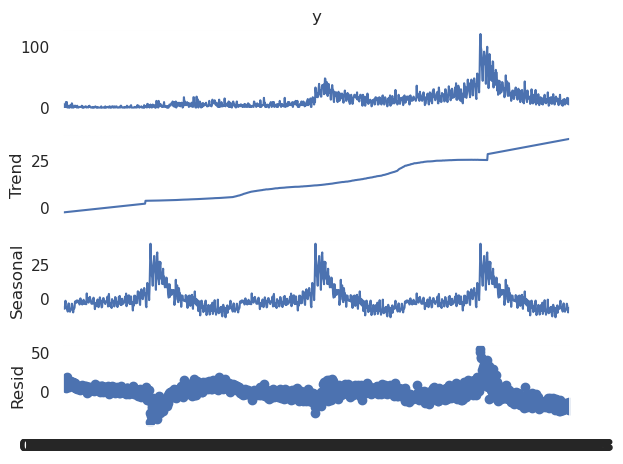

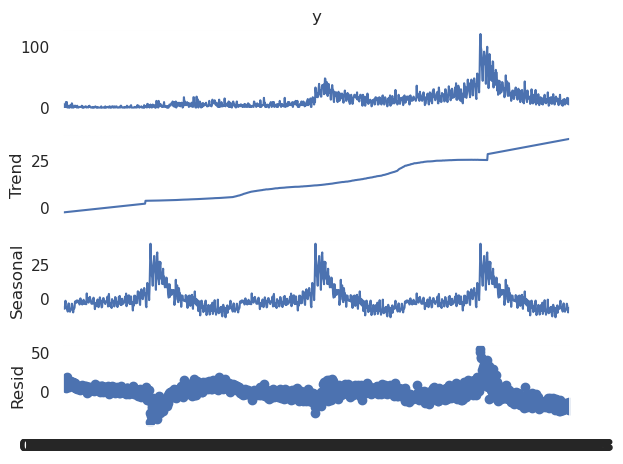

In [34]:
decomposeresult2.plot()

In [35]:
season = pd.DataFrame({"obs":decomposeresult2.observed,"trend":decomposeresult2.trend,"seasonal":decomposeresult2.seasonal,"resid":decomposeresult2.resid})
season.index=pd.to_datetime(season.index,format="%d-%m-%Y")
season=season.fillna(0)
season=season.sort_index()
season.index=season.index.to_period("D")
season.index=season.index.to_timestamp()
season.index=season.index.strftime('%Y-%m-%d')

In [22]:
season

,obs,trend,seasonal,resid
2020-01-01,2.0,-2.308373,-7.070160,11.378533
2020-01-02,7.0,-2.282691,-6.098721,15.381411
2020-01-03,2.0,-2.257009,-6.373857,10.630866
2020-01-04,2.0,-2.231327,-7.172966,11.404293
2020-01-05,3.0,-2.205645,-3.724815,8.930459
...,...,...,...,...
2023-07-15,7.0,36.582330,-7.813091,-21.769239
2023-07-16,13.0,36.627056,-9.877268,-13.749788
2023-07-17,16.0,36.671782,-7.421583,-13.250200
2023-07-18,6.0,36.716509,-7.237815,-23.478694


In [36]:
fig=make_subplots(rows=4, cols=1,
                      subplot_titles=("y-yhat", "Trend", "Seasonal_yearly","resid"))
fig.add_trace(
    go.Scatter(x=season.index,y=season.obs),row=1,col=1
    
)
fig.add_trace(
    go.Scatter(x=season.index,y=season.trend),row=2,col=1
)
fig.add_trace(
    go.Scatter(x=season.index,y=season.seasonal),row=3,col=1
    
)
fig.add_trace(
    go.Scatter(x=season.index,y=season.resid),row=4,col=1
    
)


fig.update_layout(height=1500, width=1500)

FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> trace 0 <i style="color:#fc9944">~1D</i>',
              'type': 'scatter',
              'uid': 'cf167179-64ca-46d0-8ab8-288019715912',
              'x': array([datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 2, 0, 0),
                          datetime.datetime(2020, 1, 3, 0, 0), ...,
                          datetime.datetime(2023, 7, 16, 0, 0),
                          datetime.datetime(2023, 7, 17, 0, 0),
                          datetime.datetime(2023, 7, 19, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 2.,  7.,  2., ..., 13., 16.,  7.]),
              'yaxis': 'y'},
             {'name': '<b style="color:sandybrown">[R]</b> trace 1 <i style="color:#fc9944">~1D</i>',
              'type': 'scatter',
              'uid': 'a89b7794-8f80-4732-aa00-320e96a3902a',
              'x': array([datetime.datetime(2020, 1, 1, 0, 0),

In [ ]:
df

,y,ds
01-01-2020,2,2020-01-01
02-01-2020,7,2020-01-02
03-01-2020,2,2020-01-03
04-01-2020,2,2020-01-04
05-01-2020,3,2020-01-05
...,...,...
15-07-2023,7,2023-07-15
16-07-2023,13,2023-07-16
17-07-2023,16,2023-07-17
18-07-2023,6,2023-07-18


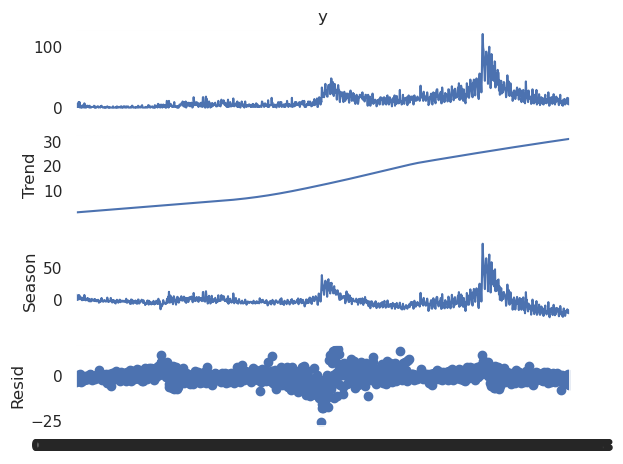

In [13]:
from statsmodels.tsa.seasonal import STL

res = STL(df["y"],period=365).fit()

res.plot()

plt.show()

In [ ]:
torch.cuda.empty_cache()

In [37]:
from dash import Dash,dcc, html, Input, Output, callback


In [41]:
app = Dash(__name__)
formtemplatescategories=pd.read_csv("/home/batuhan-saylam/Desktop/JotformProject/formTemplatesCategories.csv")
app.layout=html.Div([
    html.Div([
        html.Div([
            dcc.Dropdown(
                formtemplatescategories.metaKeywords.unique().tolist(),
                'Pharmacy Forms',
                id="y"
        )
        ],style={"width":"33%",'display':'inline-block'})
    ]),
    html.Div(
        [
        html.Div(
            
                id="plotindic",style={"width":"50%",'display':'inline-block'}
            
        ),
        html.Div(
            id="prop",style={"width":"50%","float":"right",'display':'inline-block'}

        )
        ])
        ]
    )
@callback(
    Output("plotindic","children"),
    Output("prop","children"),
    Input("y","value"),
)
def update_graph(yaxis):
    formtemplatesclones=pd.read_csv("/home/batuhan-saylam/Desktop/JotformProject/formTemplatesClones.csv",parse_dates=["date"])
    formtemplatescategories=pd.read_csv("/home/batuhan-saylam/Desktop/JotformProject/formTemplatesCategories.csv")
    formtemplates=pd.read_excel("/home/batuhan-saylam/Desktop/JotformProject/formTemplates_1_.xlsx")
    formtemplatescategoriesy=formtemplatescategories[formtemplatescategories["metaKeywords"]==yaxis].copy()
    formtemplatesclones=formtemplatesclones.rename({"templateID":"_id"},axis=1)
    formandclone=pd.merge(formtemplates,formtemplatesclones,how="inner",on="_id")
    formtemplates=formtemplates.rename({"_id":"id"},axis=1)
    formtemplates=formtemplates.rename({"_featuredCategory":"_id"},axis=1)
    formtemplates2=pd.merge(formtemplatescategoriesy,formtemplates,how="inner",on="_id")
    formtemplates2=formtemplates2.rename({"_id":"_featuredCategory"},axis=1)
    formtemplates=formtemplates.rename({"_id":"_featuredCategory"},axis=1)
    df_melt = formtemplates.assign(_categories=formtemplates._categories.str.split(","))
    formtemplates=df_melt._categories.apply(pd.Series) \
        .merge(formtemplates, right_index=True, left_index=True) \
        .drop(["_categories"], axis=1) \
        .melt(id_vars=['id',"_title","_slug","_description","_featuredCategory","_language"], value_name="_categories") \
        .drop("variable", axis=1) 
    formtemplates=formtemplates.rename({"_categories":"_id"},axis=1)
    formtemplates3=pd.merge(formtemplatescategoriesy,formtemplates,how="inner",on="_id")
    formtemplates3=formtemplates3.rename({"_id":"_categories"},axis=1)
    formtemplates=formtemplates.rename({"_id":"_categories"},axis=1)
    formtemplates=formtemplates.rename({"id":"_id"},axis=1)
    formtemplatesclones=formtemplatesclones.rename({"_id":"templateID"},axis=1)
    formcat=pd.concat([formtemplates2,formtemplates3])
    formcat=formcat.rename({"id":"_id"},axis=1)
    formcat=formcat.loc[:,[
     'name',
     'description',
     'metaKeywords',
     '_categories',
     '_id']]
    formandclone=formandclone.loc[:,[
    '_id',
     '_title',
     '_slug',
     '_description',
     '_language',
     '_featuredCategory',
     'formID',
     'form_type',
     'source',
     'date']]
    formclonecategnonnany=pd.merge(formandclone,formcat,on="_id")
    formclonecategnonnany=formclonecategnonnany.drop_duplicates(keep='first')
    formclonecategnonnany.index=formclonecategnonnany.date
    formclonecategnonnany.index=formclonecategnonnany.index.to_period("D")
    formclonecategnonnany=formclonecategnonnany.rename({"date":"date2"},axis=1)
    formclonecategnonnany["day"]=formclonecategnonnany.index.dayofweek
    formclonecategnonnany["week"]=formclonecategnonnany.index.week
    formclonecategnonnany["dayofyear"]=formclonecategnonnany.index.dayofyear
    formclonecategnonnany["year"]=formclonecategnonnany.index.year
    formclonecategnonnany["quarter"]=formclonecategnonnany.index.quarter
    formclonecategnonnany["month"]=formclonecategnonnany.index.month
    formclonecategnonnany.index=formclonecategnonnany.index.to_timestamp()
    df=psql.sqldf("select count(_id),date,year,dayofyear,week,day,quarter,month from formclonecategnonnany  group by date")
    df.index=df.date.tolist()
    df.index=pd.to_datetime(df.index)
    df.index=df.index.to_period("D")
    df.index=df.index.to_timestamp()
    df.index=df.index.strftime('%d-%m-%Y')
    decomposeresult2=seasonal_decompose(df["y"],period=365,model="add", extrapolate_trend = 'freq',two_sided=True)
    season = pd.DataFrame({"obs":decomposeresult2.observed,"trend":decomposeresult2.trend,"seasonal":decomposeresult2.seasonal,"resid":decomposeresult2.resid})
    season.index=pd.to_datetime(season.index,format="%d-%m-%Y")
    season=season.fillna(0)
    season=season.sort_index()
    season.index=season.index.to_period("D")
    season.index=season.index.to_timestamp()
    season.index=season.index.strftime('%Y-%m-%d')
    fig=make_subplots(rows=4, cols=1,
                      subplot_titles=("y-yhat", "Trend", "Seasonal_yearly","resid"))
    fig.add_trace(
        go.Scatter(x=season.index,y=season.obs),row=1,col=1
        
    )
    fig.add_trace(
        go.Scatter(x=season.index,y=season.trend),row=2,col=1
    )
    fig.add_trace(
        go.Scatter(x=season.index,y=season.seasonal),row=3,col=1
        
    )
    fig.add_trace(
        go.Scatter(x=season.index,y=season.resid),row=4,col=1
        
    )


    fig.update_layout(height=1500, width=1500)
    return html.Div([dcc.Graph(id="seasonal",figure=fig)])

if __name__ == '__main__':
	app.run(debug=True)

Dash is running on http://x86_64-conda-linux-gnu:8050/

Dash is running on http://x86_64-conda-linux-gnu:8050/

Dash is running on http://x86_64-conda-linux-gnu:8050/

Dash is running on http://x86_64-conda-linux-gnu:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


Temporary failure in name resolution


AttributeError: 'tuple' object has no attribute 'tb_frame'